### Hyperparameter tuning for DT ,refit=recall ,class_weight=default

In [ ]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [ ]:
#train
df=pd.read_csv("train.csv.zip")
X=df.drop(['ID_code','target'],axis=1)
Y=df['target']
del df;



In [ ]:
search_param={
       'max_depth' : [i for i in range(6,18,2)],
       'min_samples_leaf':[i for i in range(20,150,5)],
       'max_features':["auto","log2","sqrt",None],
       }

In [ ]:
#parameter to choose from total 12*2*3*11 combination
search_param

{'max_depth': [6, 8, 10, 12, 14, 16],
 'max_features': ['auto', 'log2', 'sqrt', None],
 'min_samples_leaf': [20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145]}

In [ ]:
clf=DecisionTreeClassifier()
model=RandomizedSearchCV(
    estimator=clf, param_distributions=search_param, 
    n_iter=100,
    scoring=['roc_auc','recall'],
    cv=5,
    refit='recall',
    n_jobs=-1,
    random_state=314,
    verbose=1000)

In [ ]:

model.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
model.best_score_

0.08682457332645059

In [ ]:
model.best_params_

{'max_depth': 12, 'max_features': None, 'min_samples_leaf': 20}

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
param=model.best_params_
clf=DecisionTreeClassifier(**param)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.724084489923023
confusion matrix :
 [[142596   1326]
 [ 13165   2913]]
Precision  0.6871903750884643
Recall  0.18117925115064062


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.6561710347650297
confusion matrix :
 [[35293   687]
 [ 3685   335]]
Precision  0.32778864970645794
Recall  0.08333333333333333


kaggle_score

In [ ]:
#train
df_te=pd.read_csv("test.csv.zip")
X_subm=df_te.drop(['ID_code'],axis=1)

del df_te;



In [ ]:
clf=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_DT_TUNING_SUBMISSION/refit_recall_class_weight_default.csv",index=False)

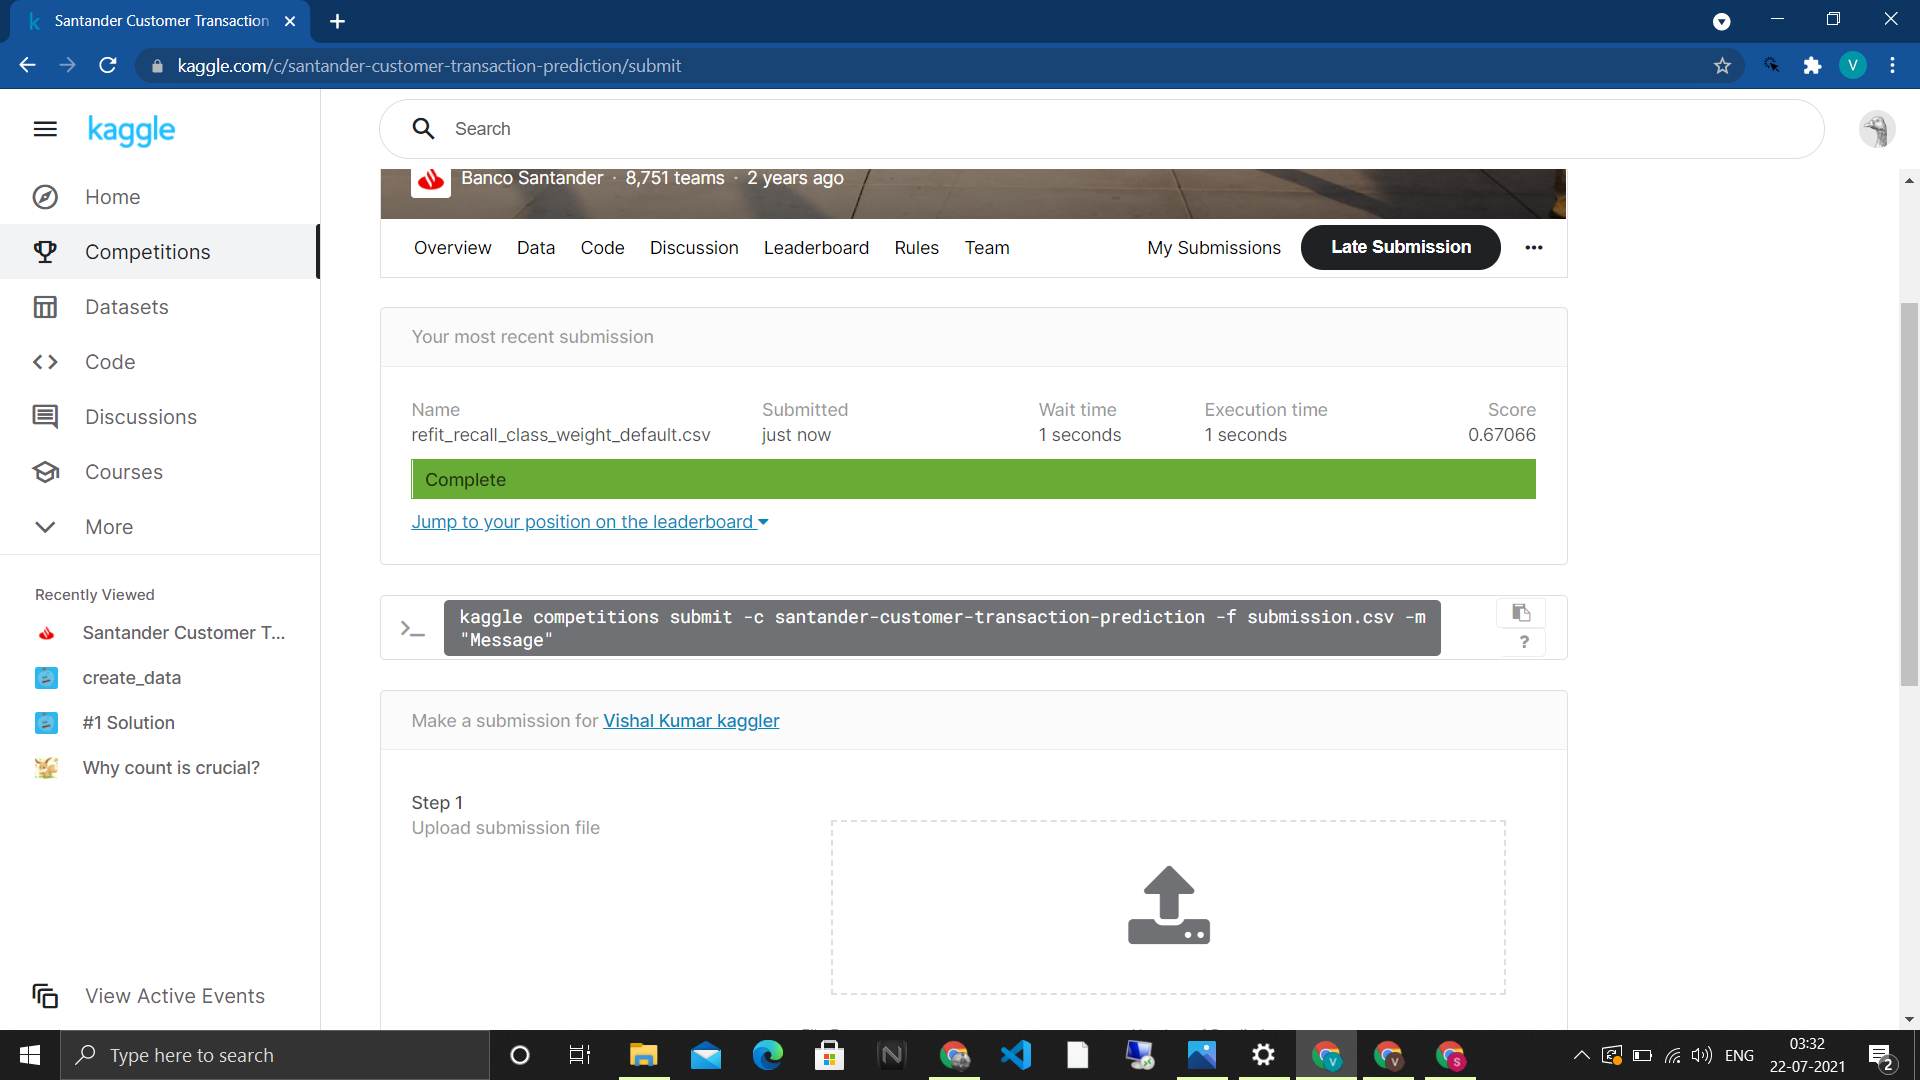

### Hyperparameter tuning for DT ,refit=roc ,class_weight=False

In [ ]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [ ]:
search_param={
       'max_depth' : [i for i in range(6,18,2)],
       'min_samples_leaf':[i for i in range(20,150,5)],
       'max_features':["auto","log2","sqrt",None],
       }

In [ ]:
clf=DecisionTreeClassifier()
model=RandomizedSearchCV(
    estimator=clf, param_distributions=search_param, 
    n_iter=100,
    scoring=['roc_auc','recall'],
    cv=5,
    refit='roc_auc',
    n_jobs=1,
    random_state=314,
    verbose=1000,
    return_train_score=True)

In [ ]:

model.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=(train=0.005, test=0.003), roc_auc=(train=0.735, test=0.656), total=   3.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=(train=0.007, test=0.003), roc_auc=(train=0.722, test=0.632), total=   2.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=(train=0.012, test=0.008), roc_auc=(train=0.729, test=0.667), total=   2.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
model.best_score_

0.6807987074287267

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
param=model.best_params_
clf=DecisionTreeClassifier(**param)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.7552816305702374
confusion matrix :
 [[143616    306]
 [ 15694    384]]
Precision  0.5565217391304348
Recall  0.02388356760791143


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.6806422687839292
confusion matrix :
 [[35892    88]
 [ 3958    62]]
Precision  0.41333333333333333
Recall  0.015422885572139304


kaggle_score

In [ ]:
clf=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_DT_TUNING_SUBMISSION/refit_auc_class_weight_default.csv",index=False)

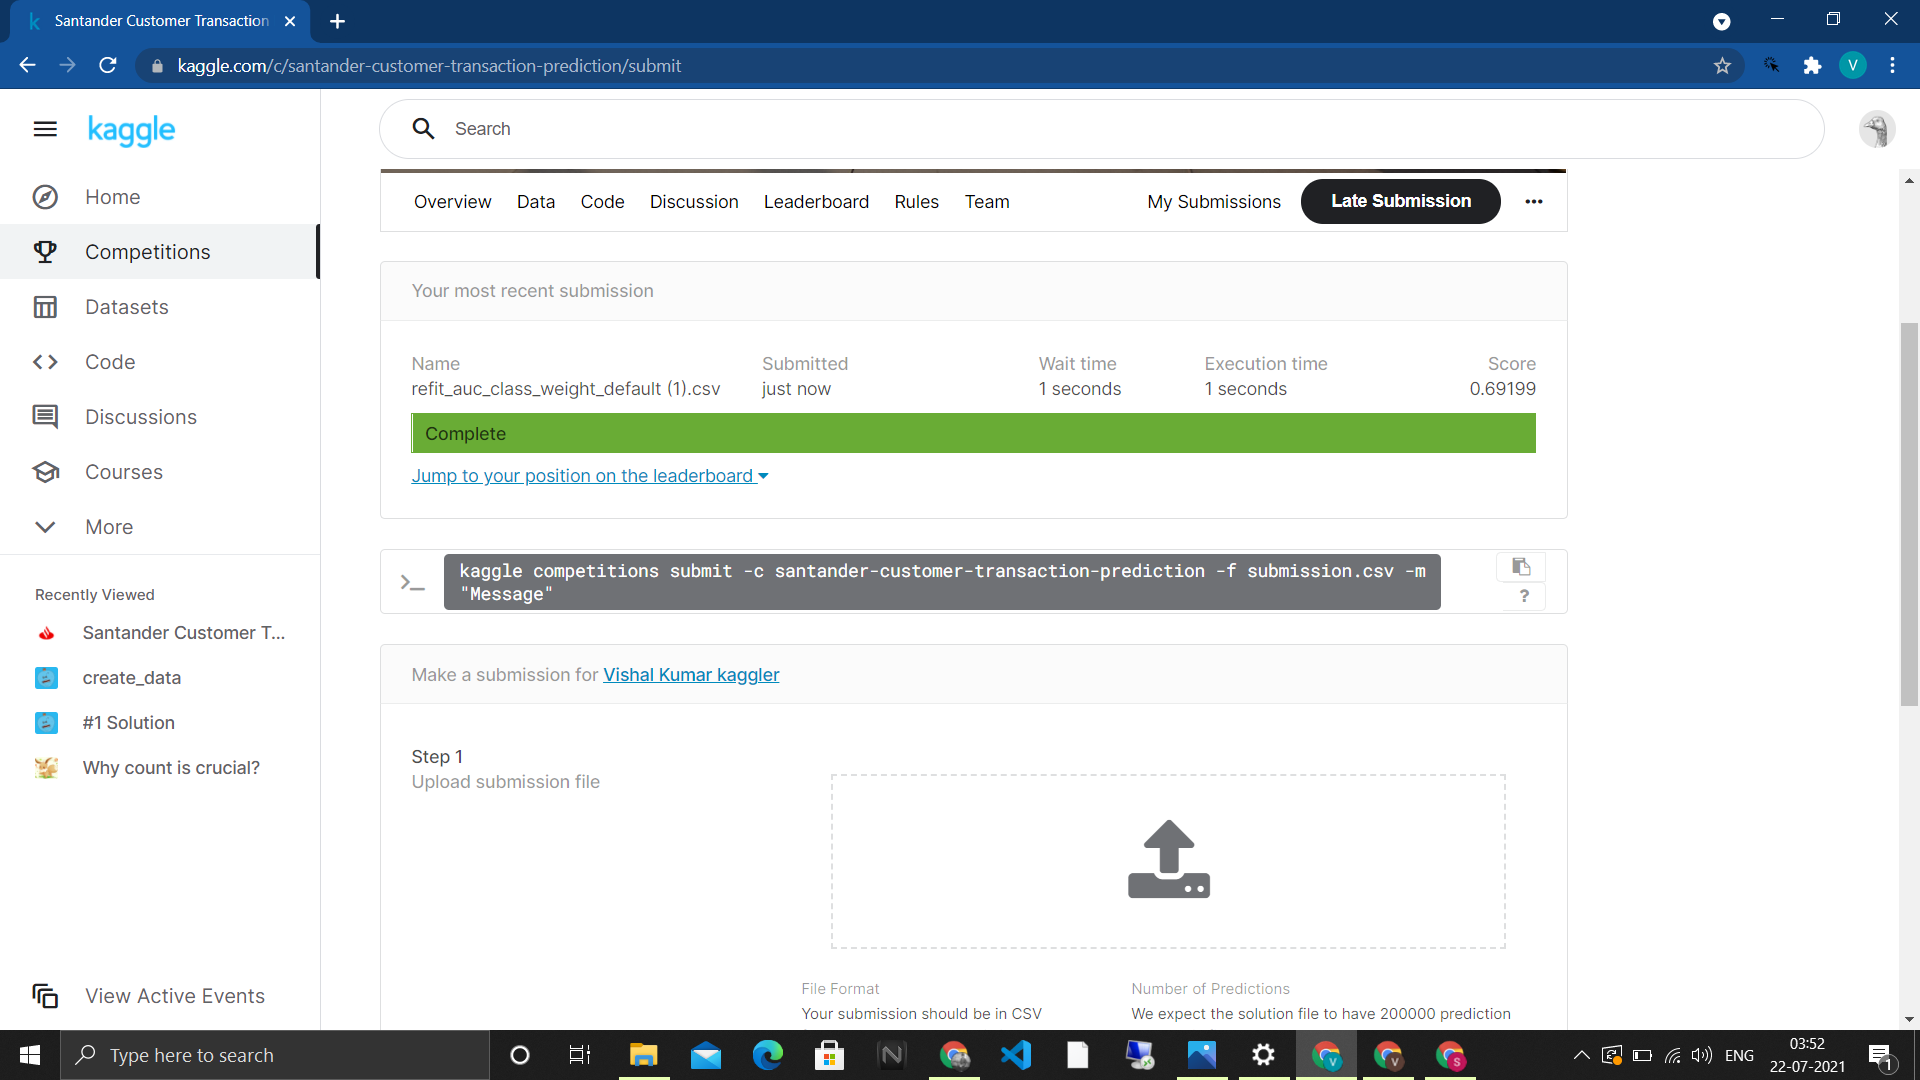

**Making weights balanced**

In [ ]:
param=model.best_params_
clf=DecisionTreeClassifier(**param,class_weight='balanced')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.7939277331893084
confusion matrix :
 [[101003  42919]
 [  3882  12196]]
Precision  0.22128277238501315
Recall  0.7585520587137704


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.651039950331721
confusion matrix :
 [[24644 11336]
 [ 1812  2208]]
Precision  0.16302421736562314
Recall  0.5492537313432836


kaggle_score

In [ ]:
clf=DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_DT_TUNING_SUBMISSION/refit_auc_class_weight_balanced_after_training.csv",index=False)

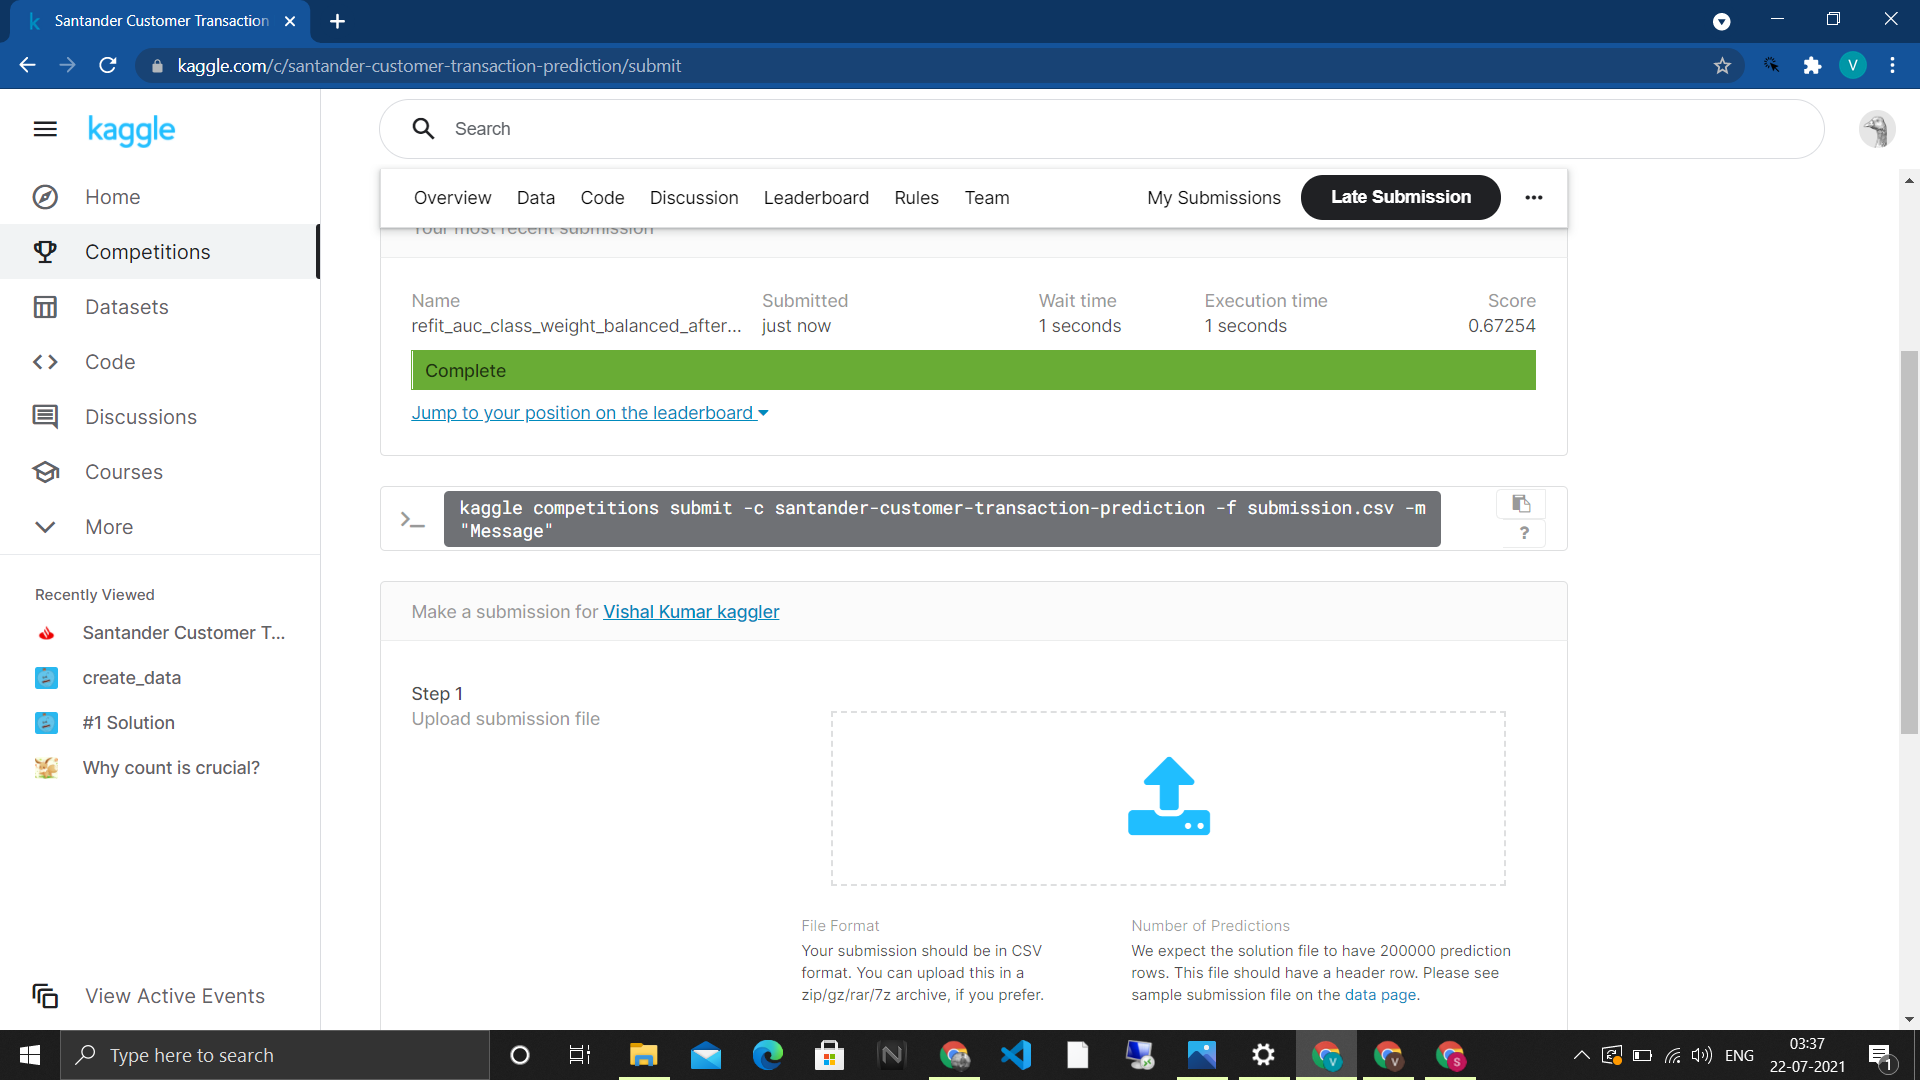

### Hyperparameter tuning for DT , refit=recall & bal=true

In [ ]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [ ]:
#train
df=pd.read_csv("train.csv.zip")
X=df.drop(['ID_code','target'],axis=1)
Y=df['target']
del df;




In [ ]:
search_param={
       'max_depth' : [i for i in range(6,18,2)],
       'min_samples_leaf':[i for i in range(20,150,5)],
       'max_features':["auto","log2","sqrt",None],
       }

In [ ]:
#parameter to choose from total 12*2*3*11 combination
search_param

{'max_depth': [6, 8, 10, 12, 14, 16],
 'max_features': ['auto', 'log2', 'sqrt', None],
 'min_samples_leaf': [20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145]}

In [ ]:
clf=DecisionTreeClassifier(class_weight='balanced')
model=RandomizedSearchCV(
    estimator=clf, param_distributions=search_param, 
    n_iter=100,
    scoring=['roc_auc','recall'],
    cv=5,
    refit='recall',
    n_jobs=1,
    random_state=314,
    verbose=1000)

In [ ]:

model.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=0.487, roc_auc=0.622, total=   3.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=0.500, roc_auc=0.628, total=   3.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=0.478, roc_auc=0.619, total=   3.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.8s remaining:    0.0s
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
    

In [ ]:
model.best_score_

0.5938380627343502

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
param=model.best_params_
clf=DecisionTreeClassifier(**param,class_weight='balanced')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.6162629667464813
confusion matrix :
 [[84727 59195]
 [ 6343  9735]]
Precision  0.1412302335702887
Recall  0.6054857569349421


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.61092587368881
confusion matrix :
 [[21279 14701]
 [ 1625  2395]]
Precision  0.14009124941506784
Recall  0.595771144278607


kaggle_score

In [ ]:
clf=DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_DT_TUNING_SUBMISSION/refit_recall_class_weight_balanced_before&after_training.csv",index=False)

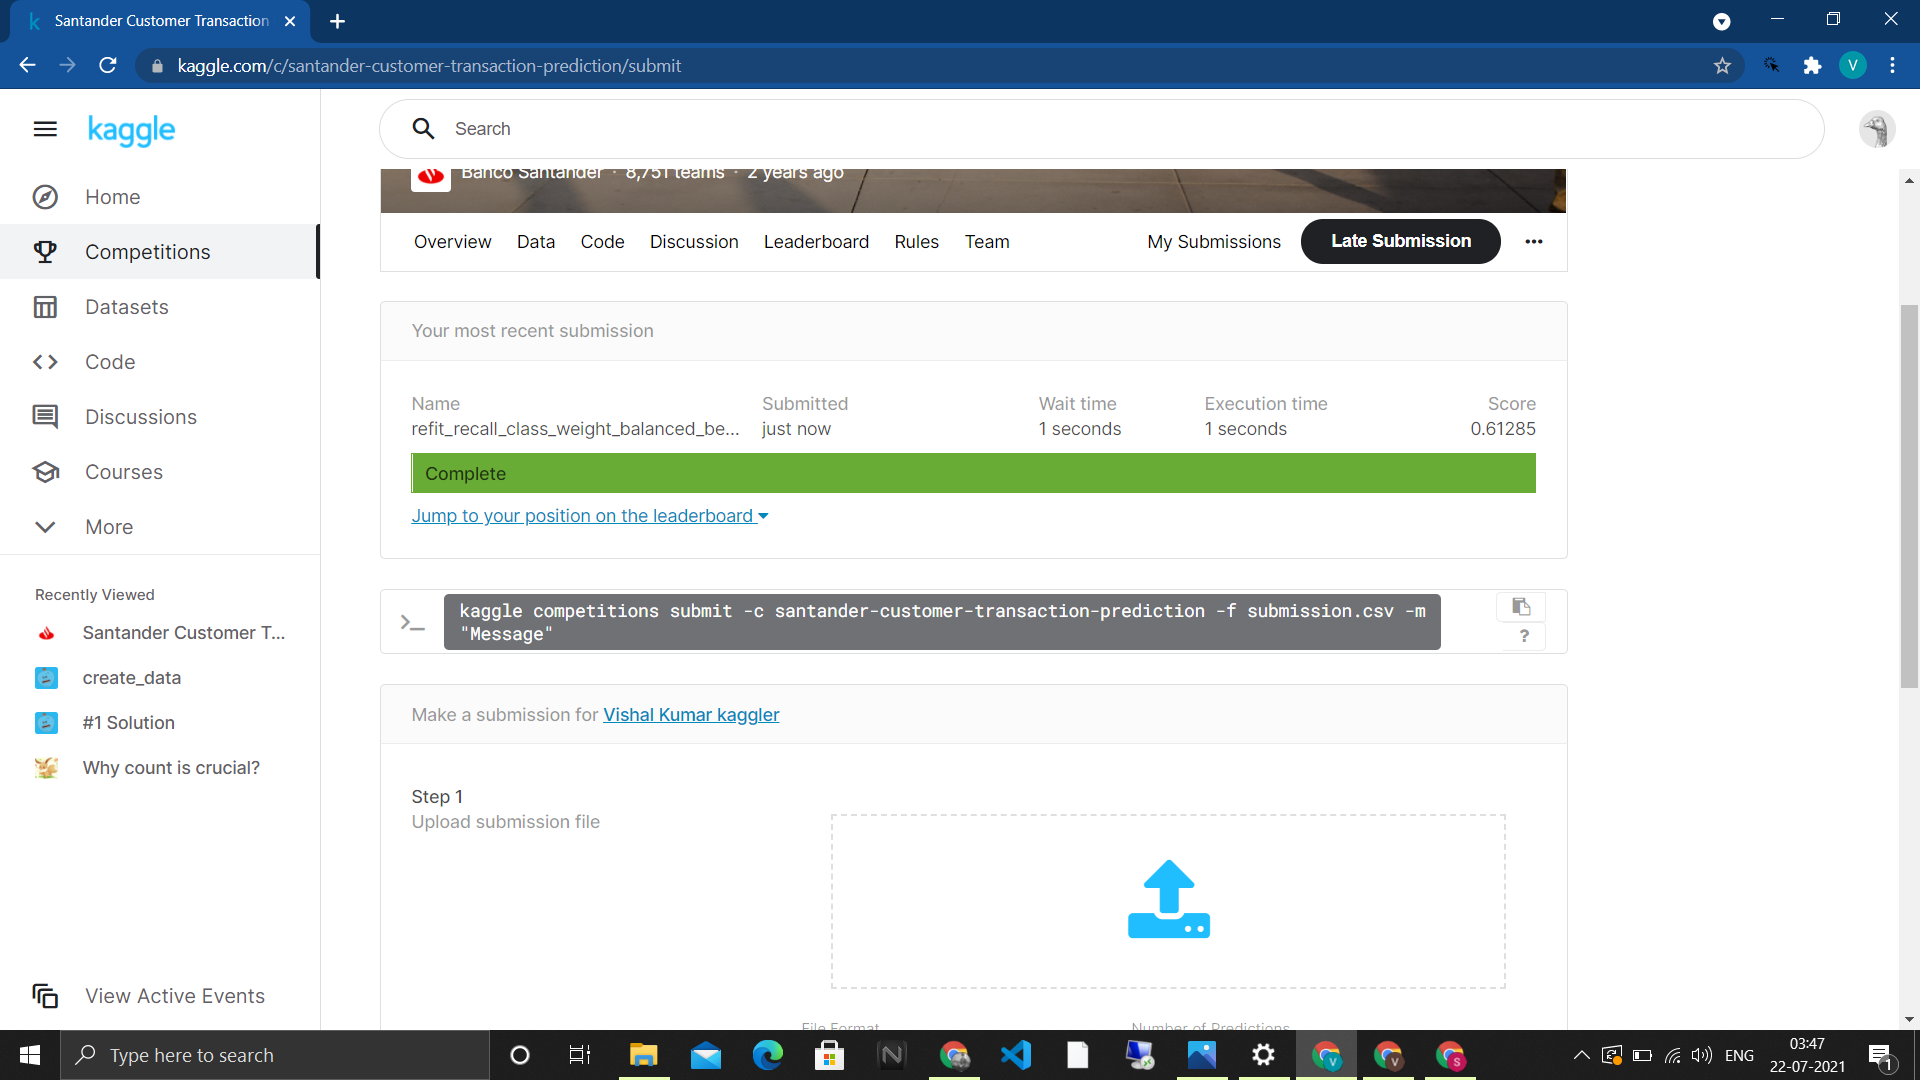

### Hyperparameter tuning for Dt,refit=auc_roc & class_weight=balanced

In [ ]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [ ]:
#train
df=pd.read_csv("train.csv.zip")
X=df.drop(['ID_code','target'],axis=1)
Y=df['target']
del df;



In [ ]:
search_param={
       'max_depth' : [i for i in range(6,18,2)],
       'min_samples_leaf':[i for i in range(20,150,5)],
       'max_features':["auto","log2","sqrt",None],
       }

In [ ]:
#parameter to choose from total 12*2*3*11 combination
search_param

{'max_depth': [6, 8, 10, 12, 14, 16],
 'max_features': ['auto', 'log2', 'sqrt', None],
 'min_samples_leaf': [20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145]}

In [ ]:
clf=DecisionTreeClassifier(class_weight='balanced')
model=RandomizedSearchCV(
    estimator=clf, param_distributions=search_param, 
    n_iter=100,
    scoring=['roc_auc','recall'],
    cv=5,
    refit='roc_auc',
    n_jobs=1,
    random_state=314,
    verbose=1000)

In [ ]:

model.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=0.468, roc_auc=0.621, total=   3.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=0.514, roc_auc=0.631, total=   3.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=60, max_features=log2, max_depth=16, recall=0.520, roc_auc=0.642, total=   3.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s remaining:    0.0s
[CV] min_samples_leaf=60, max_features=log2, max_depth=16 ............
[CV]  min_samples_leaf=

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
    

In [ ]:
model.best_score_

0.6582603421963519

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
param=model.best_params_
clf=DecisionTreeClassifier(**param,class_weight='balanced')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=130, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Train metrics**

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.7276491146944896
confusion matrix :
 [[107102  36820]
 [  6293   9785]]
Precision  0.20995601330329364
Recall  0.6085955964672223


**Test metrics**

In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.6565731134488758
confusion matrix :
 [[26514  9466]
 [ 2035  1985]]
Precision  0.17334730591214742
Recall  0.4937810945273632


kaggle_score

In [ ]:
clf=DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=130, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=130, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_DT_TUNING_SUBMISSION/refit_auc_class_weight_balanced_before&after_training.csv",index=False)

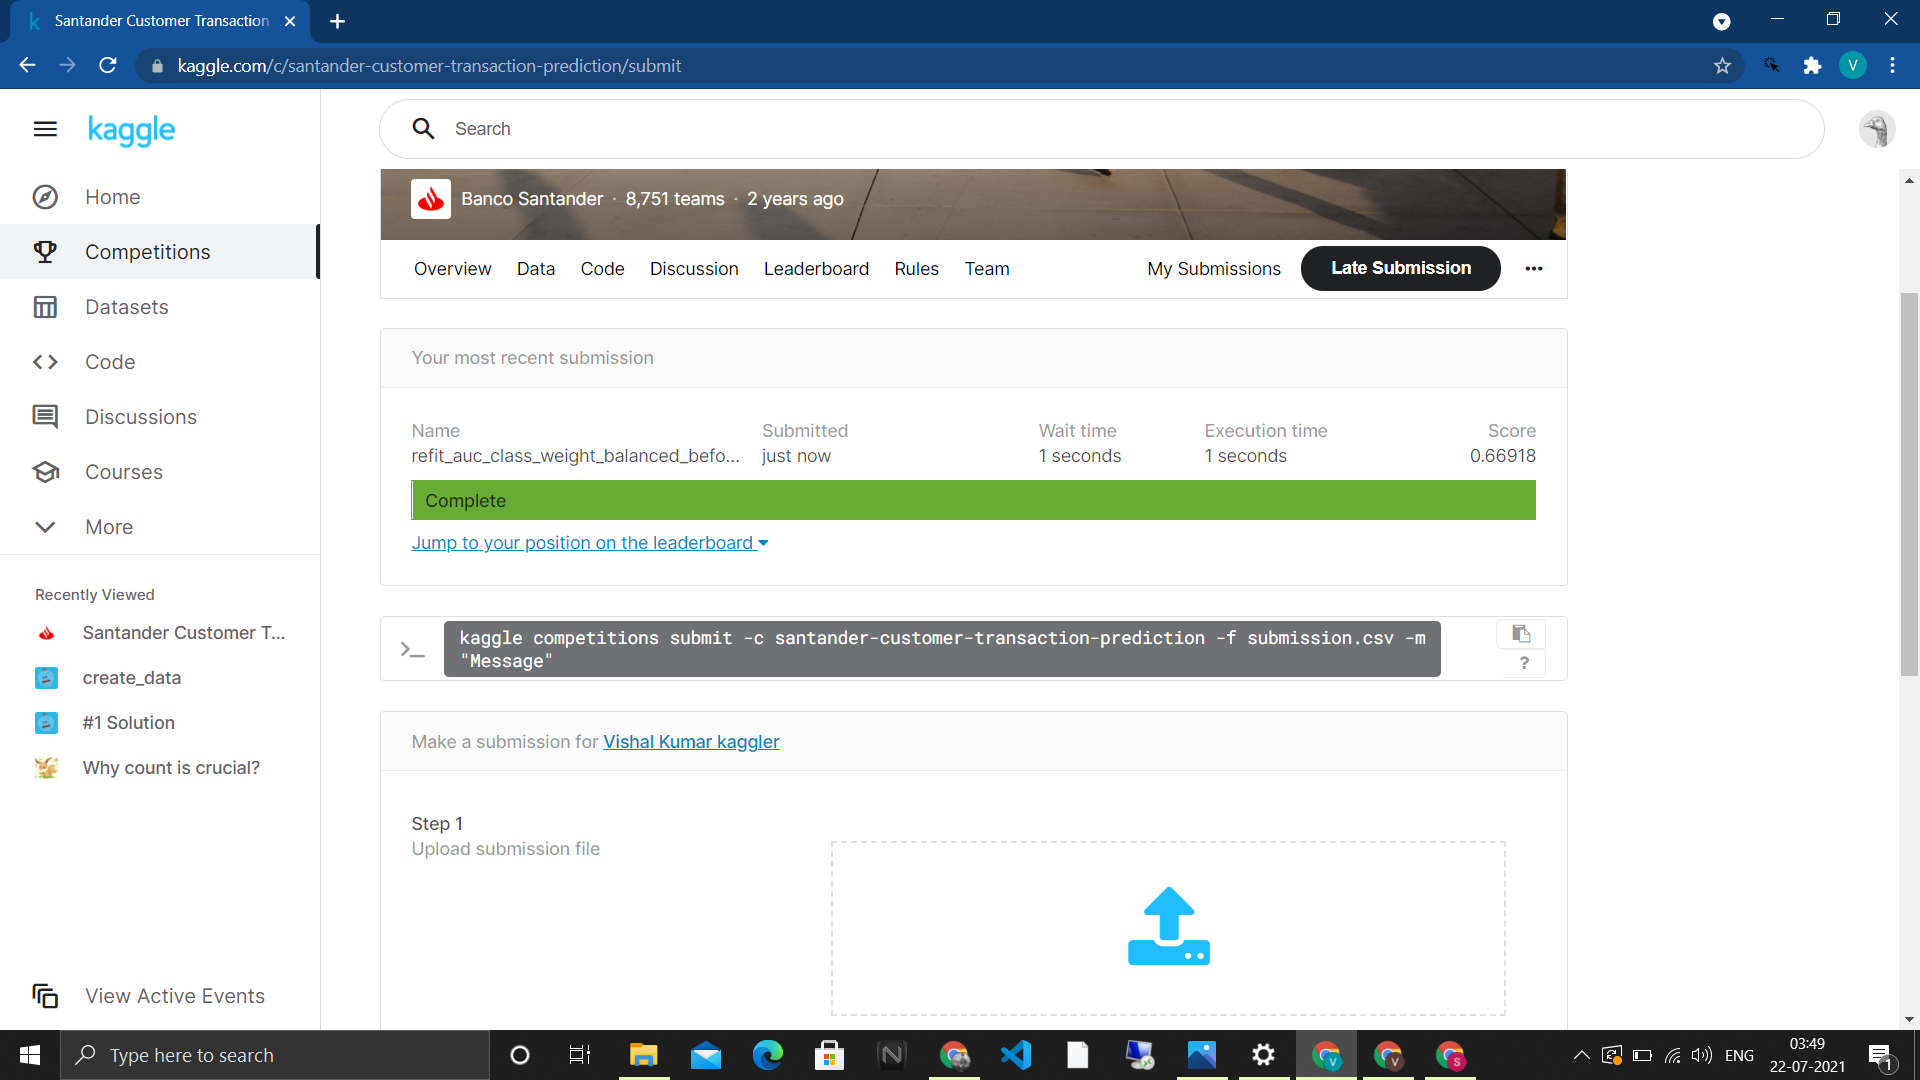

### conclusion

In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
t = PrettyTable(["Model", "Metric for refit", "class_weight", "AUC","recall"])
  
# Add rows
t.add_row(["DT","auc_roc","None"," 0.6806","0.0154"])
t.add_row(["DT","recall","None","0.6561 ","0.0833"])
t.add_row(["Dt","auc-roc","balanced","0.6565","0.4957"])
t.add_row(["DT","recall","balanced","0.6109","0.5957"])


In [ ]:
print(t)

+-------+------------------+--------------+---------+--------+
| Model | Metric for refit | class_weight |   AUC   | recall |
+-------+------------------+--------------+---------+--------+
|   DT  |     auc_roc      |     None     |  0.6806 | 0.0154 |
|   DT  |      recall      |     None     | 0.6561  | 0.0833 |
|   Dt  |     auc-roc      |   balanced   |  0.6565 | 0.4957 |
|   DT  |      recall      |   balanced   |  0.6109 | 0.5957 |
+-------+------------------+--------------+---------+--------+


**Making weights balanced**

**Tuned on class weight as none but retraining using class_weight=balanced**

In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
t = PrettyTable(["Model", "Metric for refit", "class_weight used on tuning","class_weight used for  retraining","AUC","recall","kaggle"])
  
# Add rows
t.add_row(["DT","auc_roc","None","None"," 0.6806","0.0154","0.69199"])
t.add_row(["DT","auc_roc","None","balanced","0.65103" ,"0.54925","0.67254"])
t.add_row(["Dt","auc-roc","balanced","balanced","0.6565","0.4957","0.66918"])
t.add_row(["DT","recall","None","None","0.6561 ","0.0833","0.67066"])
t.add_row(["DT","recall","balanced","balanced","0.6109","0.5957","0.61285"])

print(t)


+-------+------------------+-----------------------------+-----------------------------------+---------+---------+---------+
| Model | Metric for refit | class_weight used on tuning | class_weight used for  retraining |   AUC   |  recall |  kaggle |
+-------+------------------+-----------------------------+-----------------------------------+---------+---------+---------+
|   DT  |     auc_roc      |             None            |                None               |  0.6806 |  0.0154 | 0.69199 |
|   DT  |     auc_roc      |             None            |              balanced             | 0.65103 | 0.54925 | 0.67254 |
|   Dt  |     auc-roc      |           balanced          |              balanced             |  0.6565 |  0.4957 | 0.66918 |
|   DT  |      recall      |             None            |                None               | 0.6561  |  0.0833 | 0.67066 |
|   DT  |      recall      |           balanced          |              balanced             |  0.6109 |  0.5957 | 0.61285 |


* From above table we can conclude that 


1.   when 'auc_roc' as metric for refit used then recall score got dropped and vice versa.
2.   While setting class weight to 'balanced' recall score increased very much.
3. The demand of the problem is to use recall as a metric for evaluation.But as we can clearly see the drop of overall perfomance when 'recall' is used as a metric for evalution.
4. I am using auc_roc as a metric for evaluation and after getting optimal parameter . Using the same optimal parameter and setting class weight is equal to 'balanced' to improve recall score. 
5. But It also drops the perfomance little bit as you can see the entry number three in the above table.


